In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
A=pd.read_table('HR.txt',index_col=0)

In [5]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
A.shape

(1470, 34)

In [ ]:
A['Gender'].value_counts()

1    882
2    588
Name: Gender, dtype: int64

In [ ]:
A['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
A.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

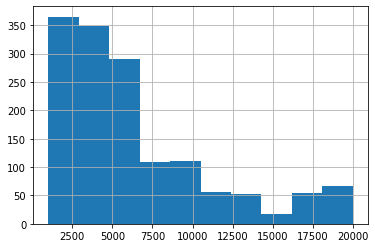

In [ ]:
A['MonthlyIncome'].hist()

In [5]:
df=A.groupby('Gender')

In [6]:
df_1=df.get_group(1)
df_2=df.get_group(2)


In [7]:
from scipy.stats import shapiro,ttest_ind,mannwhitneyu

In [8]:
shapiro(df_1['MonthlyIncome'])

(0.8169718384742737, 1.709933327621381e-30)

In [9]:
shapiro(df_2['MonthlyIncome'])

(0.8416616916656494, 9.378564564919968e-24)

In [10]:
mannwhitneyu(df_1['MonthlyIncome'],df_2['MonthlyIncome'])

MannwhitneyuResult(statistic=245722.5, pvalue=0.044208341633010594)

In [ ]:
df_1['MonthlyIncome'].describe()

count      882.000000
mean      6380.507937
std       4714.856577
min       1009.000000
25%       2819.500000
50%       4837.500000
75%       8113.750000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
df_2['MonthlyIncome'].describe()

count      588.000000
mean      6686.566327
std       4695.608507
min       1129.000000
25%       3037.000000
50%       5081.500000
75%       8711.750000
max      19973.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
A['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
AG=pd.crosstab(A['Attrition'],A['Gender'])
AG

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


In [ ]:
p1=150/882
p1

0.17006802721088435

In [ ]:
p2=87/588
p2

0.14795918367346939

In [ ]:
pp=237/1470
pp

0.16122448979591836

In [ ]:
pd.crosstab(A['Attrition'],A['Department'])

Department,1,2,3
Attrition,,,
No,354,828,51
Yes,92,133,12


In [ ]:
A1=A.groupby('Attrition')
type(A1)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
df1=A1.get_group('No')
df2=A1.get_group('Yes')

In [ ]:
df1.shape

(1233, 34)

In [ ]:
df2.shape

(237, 34)

In [ ]:
#unpaired t-Test
g1=df1['MonthlyIncome']
g2=df2['MonthlyIncome']

In [ ]:
g1.describe()

count     1233.000000
mean      6832.739659
std       4818.208001
min       1051.000000
25%       3211.000000
50%       5204.000000
75%       8834.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

(array([232., 207., 171.,  65.,  67.,  35.,  22.,   9.,  29.,  45.]),
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.]),
 <a list of 10 Patch objects>)

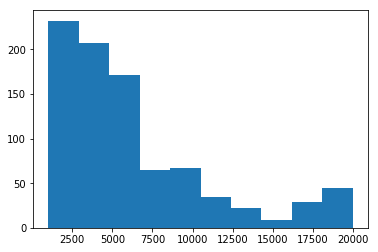

In [ ]:
plt.hist(g1)

In [ ]:
6380.507937-(1.96*4714.856577/np.sqrt(882))

6069.3432782609225

In [ ]:
g2.describe()

count      237.000000
mean      4787.092827
std       3640.210367
min       1009.000000
25%       2373.000000
50%       3202.000000
75%       5916.000000
max      19859.000000
Name: MonthlyIncome, dtype: float64

(array([146., 136., 114.,  44.,  42.,  20.,  30.,   9.,  25.,  22.]),
 array([ 1129. ,  3013.4,  4897.8,  6782.2,  8666.6, 10551. , 12435.4,
        14319.8, 16204.2, 18088.6, 19973. ]),
 <a list of 10 Patch objects>)

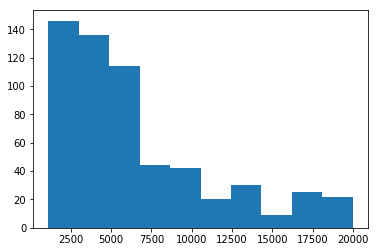

In [ ]:
plt.hist(g2)

In [ ]:
6686.566327+(1.96*4695.608507/np.sqrt(588))

7066.107843973576

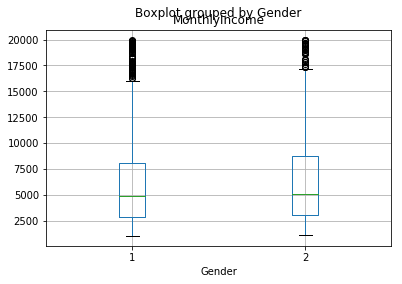

In [ ]:
A.boxplot(column='MonthlyIncome',by='Gender')

(array([232., 207., 171.,  65.,  67.,  35.,  22.,   9.,  29.,  45.]),
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.]),
 <a list of 10 Patch objects>)

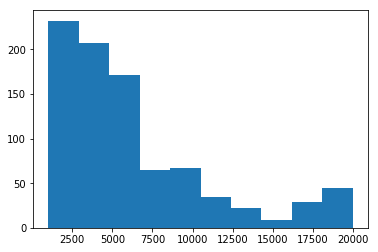

In [ ]:
plt.hist(g1)

In [ ]:
#Check for Normality
shapiro(g1)

(0.8341342210769653, 5.970143412461947e-34)

In [ ]:
shapiro(g2)

(0.7798969745635986, 1.5025734172664523e-17)

In [ ]:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=100620.5, pvalue=1.4754154586444366e-14)

In [ ]:
f=pd.crosstab(A['Attrition'],A['Gender'])
f

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


In [ ]:
#Prop of Male Employee Attr rate
p1=150/882
p1

0.17006802721088435

In [ ]:
#Prop of Female Employee Attr rate
p2=87/588
p2

0.14795918367346939

In [ ]:
#P-pooled is overall attr rate
pp=237/1470
pp

0.16122448979591836

In [ ]:
from scipy.stats import norm

In [ ]:
def twosampz(x1,x2,n1,n2):
    p1=x1/n1
    p2=x2/n2
    pp=(x1+x2)/(n1+n2)
    zdata=(p1-p2)/np.sqrt(pp*(1-pp)*((1/n1)+(1/n2)))
    pval=2*(1-norm.cdf(abs(zdata)))
    return round(zdata,3),pval

In [ ]:
zstat,p_val=twosampz(150,87,882,588)
print(zstat)
print(p_val)

1.129
0.2587903704911598


Check whether the proportion of Male employees and female employees attrition rate is same or significantly different

p-val >0.05, we fail to reject Ho, which implies Null Hyp statement is True. 
ie., Attrition is not influenced by Gender

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
x=np.array([150,87]) #x1,x2
n=np.array([882,588])  #n1,n2
proportions_ztest(x,n)

(1.1292547809155016, 0.2587903704911598)

In [ ]:
#unpaired t-Test
G1=A1['Age']
G2=A2['Age']

In [ ]:
shapiro(G2)

(0.9777933955192566, 8.791240446726079e-08)

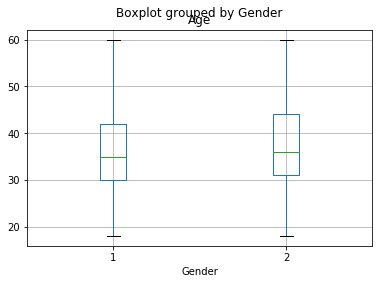

In [ ]:
A.boxplot(column='Age',by='Gender')

In [ ]:
G1.describe()

count    882.000000
mean      36.653061
std        9.042329
min       18.000000
25%       30.000000
50%       35.000000
75%       42.000000
max       60.000000
Name: Age, dtype: float64

In [ ]:
G2.describe()

count    588.000000
mean      37.329932
std        9.266083
min       18.000000
25%       31.000000
50%       36.000000
75%       44.000000
max       60.000000
Name: Age, dtype: float64

In [ ]:
B=pd.read_csv('/content/drive/My Drive/AIML_Statistical_Learning_Mahesh Anand/fair_pay_data.csv',index_col=0)
B.head()

,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [ ]:
B['department'].value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64